# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [2]:
#https://raw.githubusercontent.com/nittayac/banana/main/london-crime.csv

### Q. Define the problem domain

1. Grouping by the area's latidude and longtitude co-ordinates
2. Identify the crime type in each area defimes as often/ sometimes/ rarely happens

### Q. Identify candidate questions for your machine learning project

In [3]:
import pandas as pd
import numpy as np
from azureml.core import Workspace, Dataset

subscription_id = 'c019ba1c-b0b0-44c3-ad54-8f06cceb01c2'
resource_group = 'ml20220308'
workspace_name = 'labdp100'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='LondonCrime')
dfOr = dataset.to_pandas_dataframe()

In [4]:
pd.options.mode.chained_assignment = None 

### Q. Generate a descriptive statistics report for the columns in your dataset

In [5]:
dfOr.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,None,2016-10,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour,None,None
1,None,2016-10,City of London Police,City of London Police,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,None,None
2,None,2016-10,City of London Police,City of London Police,-0.097409,51.521145,On or near Goswell Road,E01000001,City of London 001A,Anti-social behaviour,None,None
3,None,2016-10,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Anti-social behaviour,None,None
4,None,2016-10,City of London Police,City of London Police,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,None,None


In [6]:
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24957 entries, 0 to 24956
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               20599 non-null  object 
 1   Month                  24957 non-null  object 
 2   Reported by            24957 non-null  object 
 3   Falls within           24957 non-null  object 
 4   Longitude              23434 non-null  float64
 5   Latitude               23434 non-null  float64
 6   Location               24957 non-null  object 
 7   LSOA code              23469 non-null  object 
 8   LSOA name              23469 non-null  object 
 9   Crime type             24957 non-null  object 
 10  Last outcome category  20599 non-null  object 
 11  Context                35 non-null     object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


In [7]:
for i in dfOr.columns:  
    print(f"{i} : { dfOr[i].value_counts().count()}")

Crime ID : 20462
Month : 37
Reported by : 2
Falls within : 2
Longitude : 631
Latitude : 621
Location : 435
LSOA code : 103
LSOA name : 103
Crime type : 15
Last outcome category : 26
Context : 1


In [8]:
for i in  ['Reported by','Falls within','Crime type','Context','Last outcome category']:  
    print(f"{i} : { dfOr[i].unique()}")
    print()

Reported by : ['City of London Police' 'Reported by']

Falls within : ['City of London Police' 'Falls within']

Crime type : ['Anti-social behaviour' 'Bicycle theft' 'Burglary'
 'Criminal damage and arson' 'Other theft' 'Shoplifting' 'Vehicle crime'
 'Public order' 'Theft from the person' 'Drugs'
 'Violence and sexual offences' 'Other crime' 'Possession of weapons'
 'Crime type' 'Robbery']

Context : [None 'Context']

Last outcome category : [None 'Investigation complete; no suspect identified'
 'Court result unavailable' 'Offender given suspended prison sentence'
 'Unable to prosecute suspect' 'Status update unavailable'
 'Defendant found not guilty' 'Offender given a caution'
 'Offender sent to prison' 'Offender otherwise dealt with'
 'Offender fined' 'Offender given community sentence'
 'Further investigation is not in the public interest' 'Local resolution'
 'Court case unable to proceed' 'Offender given conditional discharge'
 'Formal action is not in the public interest'
 'Offend

In [9]:
dfOr = dfOr[~(dfOr['Context'] == 'Context')]

In [10]:
#check relationship between Last outcome category and Crime type
df1 = dfOr[dfOr['Last outcome category'].isna()]
df1["Crime type"].unique()

array(['Anti-social behaviour'], dtype=object)

In [11]:
#Fill na 
dfOr.fillna(value={'Last outcome category':'Anti-social behaviour'},inplace = True)

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [12]:
for i in  ['Reported by','Falls within','Context']:  
    dfOr.drop([i], axis=1, inplace= True)

In [13]:
dfOr.head()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,None,2016-10,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Anti-social behaviour,Anti-social behaviour
1,None,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
2,None,2016-10,-0.097409,51.521145,On or near Goswell Road,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
3,None,2016-10,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour
4,None,2016-10,-0.097277,51.515307,On or near St Martin'S Le Grand,E01000001,City of London 001A,Anti-social behaviour,Anti-social behaviour


Q. Is there any imbalance in the label
?

In [14]:
for i in dfOr.columns:  
    print(f"{i} : { dfOr[i].value_counts().count()}")

Crime ID : 20461
Month : 36
Longitude : 631
Latitude : 621
Location : 434
LSOA code : 102
LSOA name : 102
Crime type : 14
Last outcome category : 26


In [15]:
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24922 entries, 0 to 24956
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               20564 non-null  object 
 1   Month                  24922 non-null  object 
 2   Longitude              23434 non-null  float64
 3   Latitude               23434 non-null  float64
 4   Location               24922 non-null  object 
 5   LSOA code              23434 non-null  object 
 6   LSOA name              23434 non-null  object 
 7   Crime type             24922 non-null  object 
 8   Last outcome category  24922 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [16]:
from sklearn.preprocessing import LabelEncoder 

for col in dfOr.select_dtypes(include='object').columns:
    le = LabelEncoder()
    dfOr[col]= le.fit_transform(dfOr[col])
    print(col)

Crime ID
Month
Location
LSOA code
LSOA name
Crime type
Last outcome category


Q. Are there any outliers in the dataset? What do you do with them?

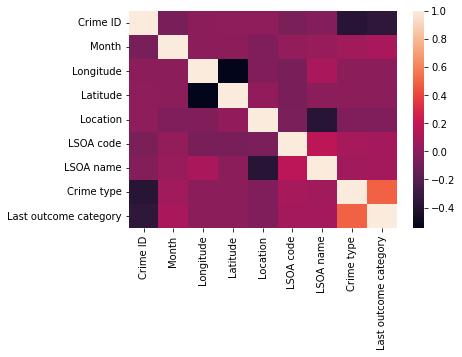

In [17]:
#This will show data that data type is interger , float (not string)
corr = dfOr.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

In [18]:
#24922 - 23434 = 1488
dfOr[dfOr['Longitude'].isna() & dfOr['Latitude'].isna()].count()

Crime ID                 1488
Month                    1488
Longitude                   0
Latitude                    0
Location                 1488
LSOA code                1488
LSOA name                1488
Crime type               1488
Last outcome category    1488
dtype: int64

In [19]:
for i in ['Longitude','Latitude']:
    dfOr.dropna(subset=[i], inplace = True)

In [20]:
dfOr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 24891
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               23434 non-null  int32  
 1   Month                  23434 non-null  int32  
 2   Longitude              23434 non-null  float64
 3   Latitude               23434 non-null  float64
 4   Location               23434 non-null  int32  
 5   LSOA code              23434 non-null  int32  
 6   LSOA name              23434 non-null  int32  
 7   Crime type             23434 non-null  int32  
 8   Last outcome category  23434 non-null  int32  
dtypes: float64(2), int32(7)
memory usage: 1.2 MB


In [21]:
df = dfOr

In [22]:
df['Idnew'] = df.index + 1

In [23]:
df

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Idnew
0,20461,0,-0.111497,51.518226,301,6,7,0,1,1
1,20461,0,-0.097277,51.515307,361,0,10,0,1,2
2,20461,0,-0.097409,51.521145,166,0,10,0,1,3
3,20461,0,-0.097562,51.518864,300,0,10,0,1,4
4,20461,0,-0.097277,51.515307,361,0,10,0,1,5
...,...,...,...,...,...,...,...,...,...,...
24887,7209,35,-0.078779,51.508971,160,59,89,6,25,24888
24888,12565,35,-0.079130,51.507808,141,59,89,6,25,24889
24889,18800,35,-0.074901,51.506255,1,59,89,6,25,24890
24890,15644,35,-0.074901,51.506255,1,59,89,6,25,24891


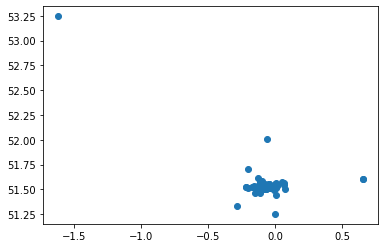

In [24]:
#importing library
import matplotlib.pyplot as plt

Longitude = np.array(df['Longitude'])
Latitude = np.array(df['Latitude'])
plt.scatter(Longitude, Latitude)
plt.show()

Nomarlize Latitude and Long

In [25]:
#normolize : x  >> Z-Score = (data-mean)/std (-3,3)
status = df.describe().T
status

,count,mean,std,min,25%,50%,75%,max
Crime ID,23434.0,12119.506956,6645.246167,0.000000,6277.250000,12555.000000,18804.750000,20461.000000
Month,23434.0,18.588845,10.480500,0.000000,10.000000,19.000000,28.000000,35.000000
Longitude,23434.0,-0.089060,0.016064,-1.621245,-0.096363,-0.086624,-0.080782,0.652838
Latitude,23434.0,51.514876,0.012569,51.252939,51.512549,51.514463,51.517244,53.245553
Location,23434.0,217.404114,124.015108,1.000000,105.000000,239.000000,312.000000,433.000000
LSOA code,23434.0,74.520654,32.757782,0.000000,90.000000,90.000000,90.000000,101.000000
LSOA name,23434.0,16.402279,12.547199,0.000000,14.000000,14.000000,14.000000,101.000000
Crime type,23434.0,6.294231,4.503621,0.000000,2.000000,6.000000,10.000000,13.000000
Last outcome category,23434.0,11.554664,8.156093,0.000000,9.000000,9.000000,22.000000,25.000000
Idnew,23434.0,12385.052317,7214.941092,1.000000,6150.250000,12300.500000,18676.750000,24892.000000


In [26]:
xmeanLong = status['mean'][2] 
xmeanLa = status['mean'][3] 
xmeanLong , xmeanLa


xstdLong = status['std'][2]
xstdLa = status['std'][3]
xstdLong,xstdLa

#z-score
df['Longitude'] = (df['Longitude'] - xmeanLong) /xstdLong   
df['Latitude'] = (df['Latitude'] - xmeanLa) /xstdLa   

In [27]:
df

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Idnew
0,20461,0,-1.396795,0.266558,301,6,7,0,1,1
1,20461,0,-0.511561,0.034322,361,0,10,0,1,2
2,20461,0,-0.519778,0.498793,166,0,10,0,1,3
3,20461,0,-0.529303,0.317317,300,0,10,0,1,4
4,20461,0,-0.511561,0.034322,361,0,10,0,1,5
...,...,...,...,...,...,...,...,...,...,...
24887,7209,35,0.639991,-0.469768,160,59,89,6,25,24888
24888,12565,35,0.618140,-0.562296,141,59,89,6,25,24889
24889,18800,35,0.881407,-0.685853,1,59,89,6,25,24890
24890,15644,35,0.881407,-0.685853,1,59,89,6,25,24891


In [28]:
#check z-score out of range [-3,3]
df = df[~((df['Longitude'] > 3 ) | (df['Longitude'] <-3 ))]
df = df[~((df['Latitude'] > 3 ) | (df['Latitude'] <-3 ))]
df

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Idnew
0,20461,0,-1.396795,0.266558,301,6,7,0,1,1
1,20461,0,-0.511561,0.034322,361,0,10,0,1,2
2,20461,0,-0.519778,0.498793,166,0,10,0,1,3
3,20461,0,-0.529303,0.317317,300,0,10,0,1,4
4,20461,0,-0.511561,0.034322,361,0,10,0,1,5
...,...,...,...,...,...,...,...,...,...,...
24887,7209,35,0.639991,-0.469768,160,59,89,6,25,24888
24888,12565,35,0.618140,-0.562296,141,59,89,6,25,24889
24889,18800,35,0.881407,-0.685853,1,59,89,6,25,24890
24890,15644,35,0.881407,-0.685853,1,59,89,6,25,24891


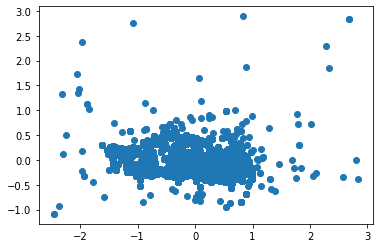

In [29]:
#importing library
import matplotlib.pyplot as plt

Longitude = np.array(df['Longitude'])
Latitude = np.array(df['Latitude'])
plt.scatter(Longitude, Latitude)
plt.show()

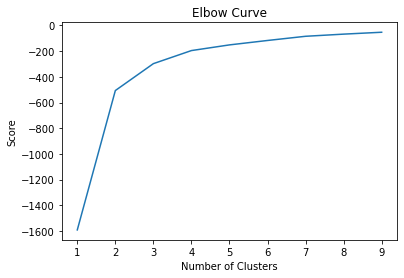

In [30]:
from sklearn.cluster import KMeans
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
# Variable with the Longitude and Latitude
X=df.loc[:,['Idnew','Latitude','Longitude']]
X.head(10)

,Idnew,Latitude,Longitude
0,1,0.266558,-1.396795
1,2,0.034322,-0.511561
2,3,0.498793,-0.519778
3,4,0.317317,-0.529303
4,5,0.034322,-0.511561
5,6,0.424086,-0.540135
6,7,0.435383,-0.426710
7,8,0.463309,-0.531731
8,9,0.463309,-0.531731
9,10,0.214923,-0.560429


In [32]:
#separate 3 cluster
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Idnew,Latitude,Longitude,cluster_label
0,1,0.266558,-1.396795,0
1,2,0.034322,-0.511561,2
2,3,0.498793,-0.519778,2
3,4,0.317317,-0.529303,2
4,5,0.034322,-0.511561,2
5,6,0.424086,-0.540135,2
6,7,0.435383,-0.426710,2
7,8,0.463309,-0.531731,2
8,9,0.463309,-0.531731,2
9,10,0.214923,-0.560429,2


In [33]:
X['cluster_label'].value_counts()

1    12203
2     7094
0     4096
Name: cluster_label, dtype: int64

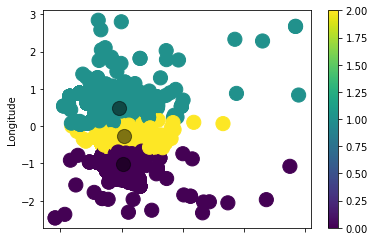

In [34]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=200, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [35]:
#cemteroid each cluster
centers = kmeans.cluster_centers_
print(centers)

[[ 0.01682267 -1.01644019]
 [-0.04982448  0.48807142]
 [ 0.04510477 -0.25986809]]


In [36]:
df = df.merge(X[['Idnew','cluster_label']],how="inner",on ="Idnew")

In [37]:
df['cluster_label'].value_counts()

1    12203
2     7094
0     4096
Name: cluster_label, dtype: int64

In [38]:
df.head()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Idnew,cluster_label
0,20461,0,-1.396795,0.266558,301,6,7,0,1,1,0
1,20461,0,-0.511561,0.034322,361,0,10,0,1,2,2
2,20461,0,-0.519778,0.498793,166,0,10,0,1,3,2
3,20461,0,-0.529303,0.317317,300,0,10,0,1,4,2
4,20461,0,-0.511561,0.034322,361,0,10,0,1,5,2


In [39]:
df['Crime type'].value_counts()

6     5408
0     4314
13    3175
10    2470
11    1728
1     1228
4     1147
8      989
2      865
3      711
12     566
5      372
9      253
7      167
Name: Crime type, dtype: int64

<Figure size 432x288 with 0 Axes>

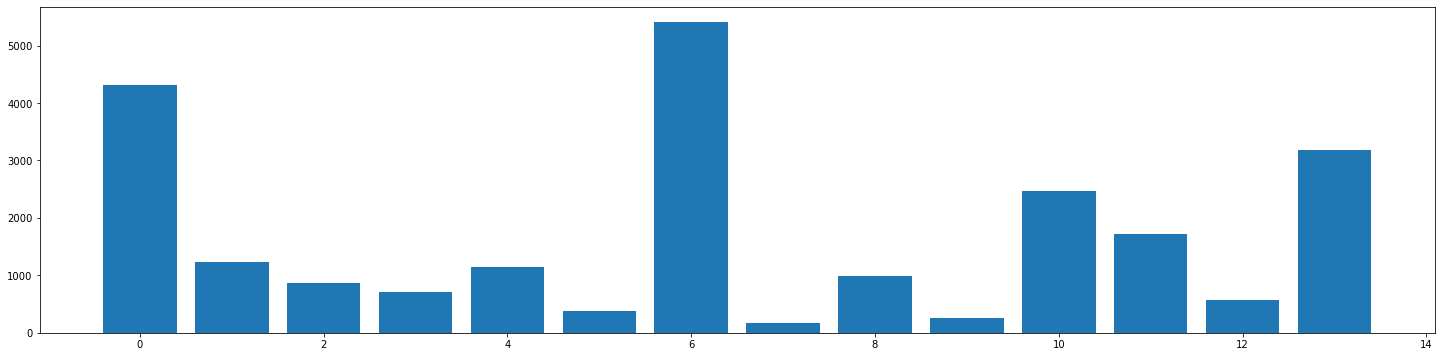

In [40]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(25,6))
m_and_b_counts = df['Crime type'].value_counts()
plt.bar(m_and_b_counts.index,m_and_b_counts )
#plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

Catargorise crime type in each cluster:: Often/ Sometimes / Sligthly

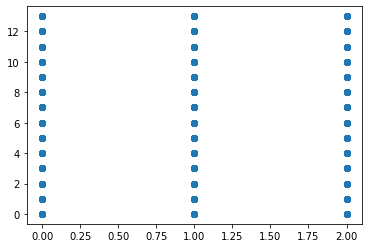

In [41]:
#importing library
import matplotlib.pyplot as plt
#datasets
Longitude = np.array(df['cluster_label'])
Latitude = np.array(df['Crime type'])
plt.scatter(Longitude, Latitude)
plt.show()

In [42]:
df[df['cluster_label']==i].describe().T

,count,mean,std,min,25%,50%,75%,max
Crime ID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSOA code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSOA name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last outcome category,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idnew,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.set_index("Idnew",inplace = True)

In [44]:
df

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster_label
Idnew,,,,,,,,,,
1,20461,0,-1.396795,0.266558,301,6,7,0,1,0
2,20461,0,-0.511561,0.034322,361,0,10,0,1,2
3,20461,0,-0.519778,0.498793,166,0,10,0,1,2
4,20461,0,-0.529303,0.317317,300,0,10,0,1,2
5,20461,0,-0.511561,0.034322,361,0,10,0,1,2
...,...,...,...,...,...,...,...,...,...,...
24888,7209,35,0.639991,-0.469768,160,59,89,6,25,1
24889,12565,35,0.618140,-0.562296,141,59,89,6,25,1
24890,18800,35,0.881407,-0.685853,1,59,89,6,25,1


In [45]:
def ckeckPercetClass(input,p25,p50):
    cls = 0 
    if float(p50) < input :
        cls = 2
    elif (float(p25) < input) & (float(p50) >= input) :
        cls = 1
    return cls

In [46]:
lsCus = list(df['cluster_label'].unique())
counts = len(df)
lsCat =[]
lsdf =[]
for i in lsCus:
    status = pd.DataFrame()
    status =df[df['cluster_label']==i].describe().T
    p25 = status['25%'][7]  #for categorise the crime type
    p50 = status['50%'][7] 
    p75 = status['75%'][7] 
    #print(i,p25,p50)
    lsCat.append([i,p25,p50,p75,counts])
    percentage =(df[df['cluster_label']==i]['Crime type'].value_counts()/counts) *100
    #status = df[df['cluster_label']==i]['Crime type'].apply(lambda x : ckeckPercetClass(percentage[x],p25,p50)).to_frame()
    row_df1 = df[df['cluster_label']==i]['Crime type'].apply(lambda x : ckeckPercetClass(percentage[x],2,6))
    for keys,vals in row_df1.items() :
        if (keys,vals) not in lsdf:
            lsdf.append([keys,vals])

In [47]:
dfCat = pd.DataFrame()
dfCat = pd.DataFrame(lsdf,columns=["Idnew2","Crime Cat"],)

In [48]:
dfCat.set_index("Idnew2",inplace = True)

In [49]:
#df = 23393
dfCat[dfCat.notna()]

,Crime Cat
Idnew2,
1,1
110,1
120,1
143,1
144,1
...,...
24888,2
24889,2
24890,2


In [50]:
crime = pd.merge(df,dfCat, left_index=True, right_index=True)
crime

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,cluster_label,Crime Cat
1,20461,0,-1.396795,0.266558,301,6,7,0,1,0,1
2,20461,0,-0.511561,0.034322,361,0,10,0,1,2,1
3,20461,0,-0.519778,0.498793,166,0,10,0,1,2,1
4,20461,0,-0.529303,0.317317,300,0,10,0,1,2,1
5,20461,0,-0.511561,0.034322,361,0,10,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
24888,7209,35,0.639991,-0.469768,160,59,89,6,25,1,2
24889,12565,35,0.618140,-0.562296,141,59,89,6,25,1,2
24890,18800,35,0.881407,-0.685853,1,59,89,6,25,1,2
24891,15644,35,0.881407,-0.685853,1,59,89,6,25,1,2


In [51]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23393 entries, 1 to 24892
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               23393 non-null  int32  
 1   Month                  23393 non-null  int32  
 2   Longitude              23393 non-null  float64
 3   Latitude               23393 non-null  float64
 4   Location               23393 non-null  int32  
 5   LSOA code              23393 non-null  int32  
 6   LSOA name              23393 non-null  int32  
 7   Crime type             23393 non-null  int32  
 8   Last outcome category  23393 non-null  int32  
 9   cluster_label          23393 non-null  int32  
 10  Crime Cat              23393 non-null  int64  
dtypes: float64(2), int32(8), int64(1)
memory usage: 1.4 MB


Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [52]:
x = crime.iloc[: ,2:10]                              #input
y = crime.loc[:,["Crime Cat"]]   

In [53]:
#separate data from training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

# Part 3: Model Selection

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model3 = algo
  model3.fit(xtrain, ytrain.values.ravel())
  predictions = model3.predict(xtest)
  print(accuracy_score(predictions, ytest))

0.9944432571062193
0.9961530241504595
0.5672152169266937
0.99957255823894
0.8621500320581321
0.43876896772814705


C:\Users\nitta\Documents\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [55]:
#Classufication : Navie Bayes
from sklearn.naive_bayes import GaussianNB
final_model = RandomForestClassifier()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)

C:\Users\nitta\AppData\Local\Temp/ipykernel_7164/1422515168.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(xtrain,ytrain)


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [56]:
#Accuracy
print(accuracy_score(p, ytest))

0.9959393032699295


# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [57]:
from joblib import dump
dump(final_model, 'MLLondonCrimeSt.joblib') 

['MLLondonCrimeSt.joblib']

In [58]:
import sklearn
sklearn.__version__

'0.24.2'